In [1]:
# trabajamos sobre el fichero con el left join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('Input/bridge_full_vf1.csv')

In [21]:
def plot_iv_hv_ratio_histogram(df_chart, column_name='IV_HV_Ratio'):
    """
    Plots a histogram of the specified column from a DataFrame along with a normal distribution curve.
    
    Parameters:
    - df_chart: DataFrame containing the data.
    - column_name: The name of the column to analyze and plot. Defaults to 'IV_HV_Ratio'.
    """
    # Ensure the column is of type float
    df_chart[column_name] = df_chart[column_name].astype(float)

    # Calculate statistics for the column
    mediana = df_chart[column_name].median()
    media = df_chart[column_name].mean()
    std_dev = df_chart[column_name].std()

    # Draw a histogram using the `density=True` parameter to normalize
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.hist(df_chart[column_name], bins=50, density=True, color='blue', alpha=0.5, label='Histogram')

    # Draw a line at the median
    ax.axvline(x=mediana, color='orange', linestyle='--', label='Median')

    # Generate data for a normal distribution curve extending the range
    x = np.linspace(media - 3 * std_dev, media + 3 * std_dev, 100)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / std_dev) ** 2)

    # Overlay the normal curve
    ax.plot(x, y, color='red', label='Normal Curve')

    # Add labels, title, and legend
    ax.set_xlabel('IV/HV Ratio')
    ax.set_ylabel('Density')
    ax.set_title(f'{column_name} Histogram with Normal Curve')

    # Adjust x-axis limits to ensure the curve isn't cut off
    ax.set_xlim([media - 3 * std_dev, media + 3 * std_dev])
    ax.legend()

    plt.show()

In [32]:
pd.set_option('display.max_rows', None)
symbol = 'FDX'
df_fdx = df[df['ticker'] == symbol ]
columns = ['timestamp','ticker', 'optionSymbol', 'optionBidPrice', 'optionAskPrice', 'underlyingPrice', 'optionIv', 'HV_180d', 'IV_HV_Ratio', 'earnings_date','optionDelta', 'optionGamma','optionTheta','optionVega']
df_fdx = df_fdx[columns]
print (len(df))

hv_avg = df_fdx['HV_180d'].mean()

# Replace the values in IV_HV_Ratio with the values from optionIv divided by hv_avg
df_fdx['IV_HV_Ratio'] = df_fdx['optionIv'] / hv_avg

print(f"The average value of the 'HV_180d' column is: {hv_avg}")
df_fdx = df_fdx.reset_index(drop=True)
df_fdx

22871
The average value of the 'HV_180d' column is: 0.31470493449781656


,timestamp,ticker,optionSymbol,optionBidPrice,optionAskPrice,underlyingPrice,optionIv,HV_180d,IV_HV_Ratio,earnings_date,optionDelta,optionGamma,optionTheta,optionVega
0,2023-01-03 10:00:00,FDX,FDX 230317P00180000,13.35,13.65,175.59,0.3608,0.4740,1.146471,NaN,-0.5255,0.0142,-0.0641,0.3131
1,2023-01-03 11:00:00,FDX,FDX 230317P00180000,12.50,12.70,177.20,0.3582,0.4740,1.138209,NaN,-0.5033,0.0142,-0.0649,0.3142
2,2023-01-03 12:00:00,FDX,FDX 230317P00180000,13.05,13.30,175.99,0.3571,0.4740,1.134714,NaN,-0.5208,0.0144,-0.0637,0.3135
3,2023-01-03 13:00:00,FDX,FDX 230317P00180000,13.35,13.60,175.46,0.3581,0.4740,1.137891,NaN,-0.5282,0.0144,-0.0635,0.3117
4,2023-01-03 14:00:00,FDX,FDX 230317P00180000,13.05,13.20,176.14,0.3581,0.4740,1.137891,NaN,-0.5184,0.0143,-0.0641,0.3134
5,2023-01-03 15:00:00,FDX,FDX 230317P00180000,12.85,13.05,176.34,0.3559,0.4740,1.130901,NaN,-0.5161,0.0144,-0.0638,0.3134
6,2023-01-03 16:00:00,FDX,FDX 230317P00180000,12.40,12.60,177.31,0.3573,0.4740,1.135349,NaN,-0.5020,0.0143,-0.0649,0.3138
7,2023-01-04 10:00:00,FDX,FDX 230317P00185000,13.10,13.50,180.90,0.3524,0.4746,1.119779,NaN,-0.5219,0.0143,-0.0649,0.3203
8,2023-01-04 11:00:00,FDX,FDX 230317P00185000,12.85,13.10,181.24,0.3477,0.4746,1.104844,NaN,-0.5182,0.0144,-0.0642,0.3205
9,2023-01-04 12:00:00,FDX,FDX 230317P00185000,12.45,12.70,181.88,0.3455,0.4746,1.097854,NaN,-0.5094,0.0145,-0.0642,0.3207


In [33]:
inicio = 540
fin = 550
df_chart = df_fdx.loc[inicio:fin]

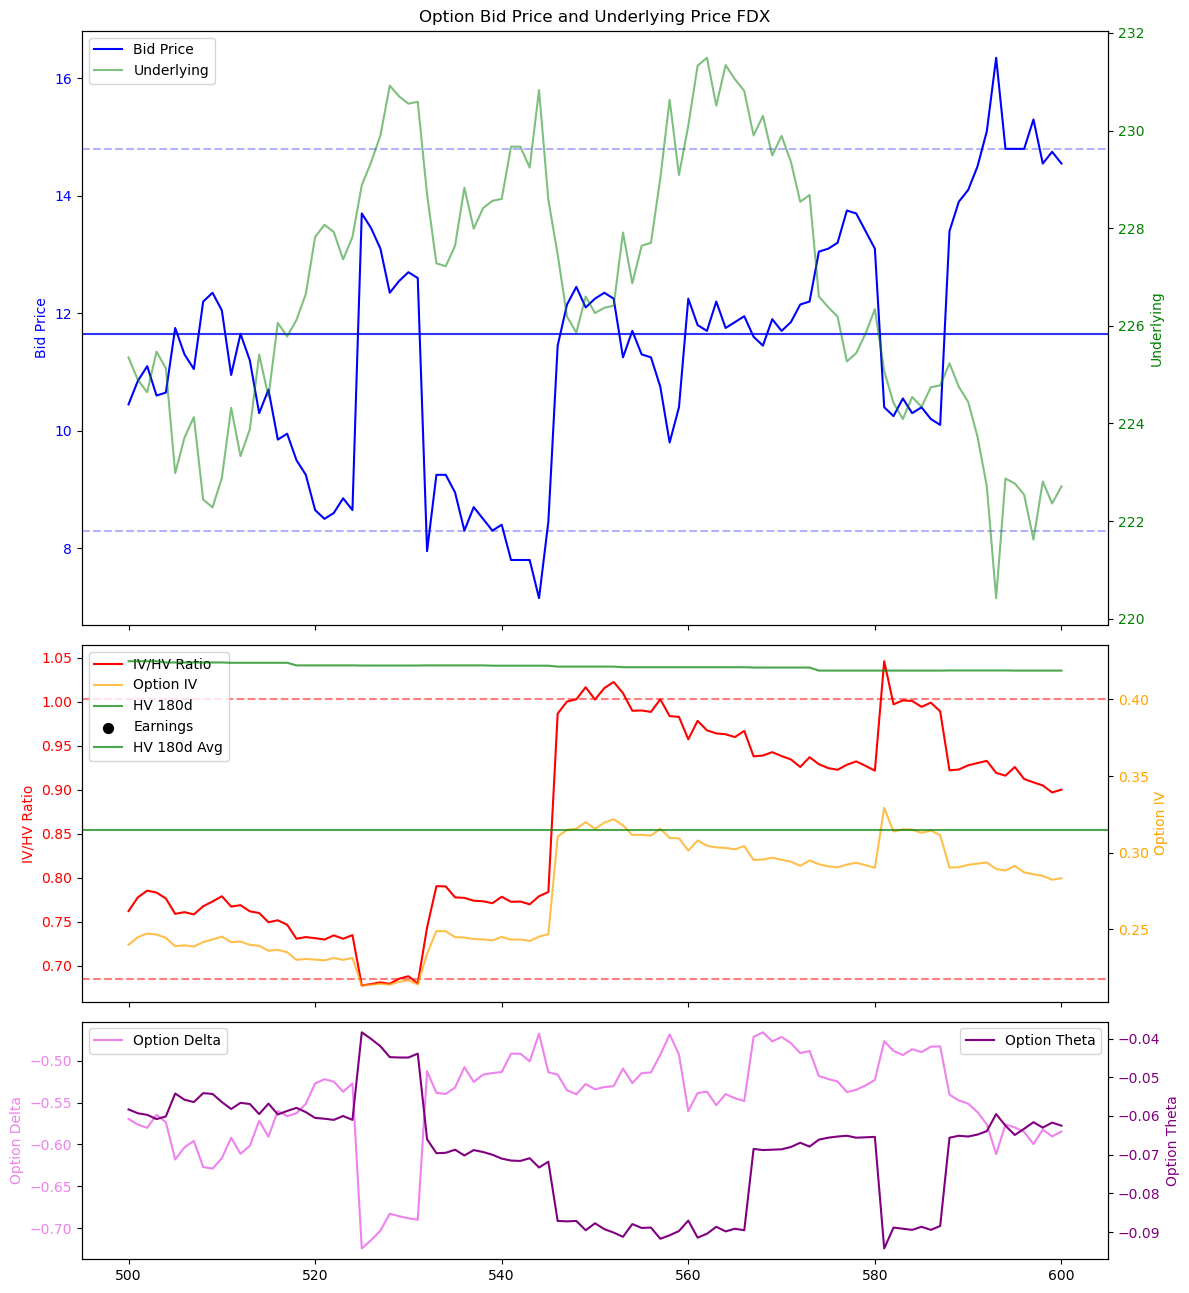

In [28]:
import matplotlib.pyplot as plt

def plot_option_bid_price_index(df_chart, bid_column='optionBidPrice', underlying_column='underlyingPrice', ratio_column='IV_HV_Ratio', iv_column='optionIv', hv_column='HV_180d', delta_column='optionDelta', theta_column='optionTheta', earnings_column='earnings_date', symbol=''):
    # Create a plot figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 14), sharex=True, gridspec_kw={'height_ratios': [5, 3, 2]})

    # --- Plot on the first subplot (ax1) ---
    ax1.plot(df_chart.index, df_chart[bid_column], color='blue', label='Bid Price')
    ax1.set_ylabel('Bid Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Calculate the 95th, 5th, and 50th percentiles
    p95 = df_chart[bid_column].quantile(0.95)
    p5 = df_chart[bid_column].quantile(0.05)
    p50 = df_chart[bid_column].quantile(0.5)

    # Draw percentile lines on the primary y-axis
    ax1.axhline(y=p95, color='blue', linestyle='--', alpha=0.3)
    ax1.axhline(y=p5, color='blue', linestyle='--', alpha=0.3)
    ax1.axhline(y=p50, color='blue', linestyle='-', alpha=0.8)

    # Create a secondary y-axis on ax1 for the underlying price (right side)
    ax1_twin = ax1.twinx()
    ax1_twin.plot(df_chart.index, df_chart[underlying_column], color='green', alpha=0.5, label='Underlying')
    ax1_twin.set_ylabel('Underlying', color='green')
    ax1_twin.tick_params(axis='y', labelcolor='green')

    # --- Plot on the second subplot (ax2) ---
    ax2.plot(df_chart.index, df_chart[ratio_column], color='red', label='IV/HV Ratio')
    ax2.set_ylabel('IV/HV Ratio', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Calculate the 95th and 5th percentiles for the IV/HV Ratio
    p95_ratio = df_chart[ratio_column].quantile(0.95)
    p5_ratio = df_chart[ratio_column].quantile(0.05)

    # Draw the 95th and 5th percentile lines on the second subplot
    ax2.axhline(y=p95_ratio, color='red', linestyle='--', alpha=0.5)
    ax2.axhline(y=p5_ratio, color='red', linestyle='--', alpha=0.5)

    # Create a secondary y-axis on ax2 for the option IV column
    ax2_twin = ax2.twinx()
    ax2_twin.plot(df_chart.index, df_chart[iv_column], color='orange', alpha=0.7, label='Option IV')
    ax2_twin.set_ylabel('Option IV', color='orange')
    ax2_twin.tick_params(axis='y', labelcolor='orange')

    # Add the HV_180d column to the secondary y-axis in green
    ax2_twin.plot(df_chart.index, df_chart[hv_column], color='green', linestyle='-', alpha=0.7, label='HV 180d')

    # Plot a black dot where earnings_date is not null
    earnings_indices = df_chart.index[df_chart[earnings_column].notnull()]
    earnings_values = df_chart.loc[earnings_indices, iv_column]
    ax2_twin.scatter(earnings_indices, earnings_values, color='black', s=50, label='Earnings', zorder=5)

    # --- Plot on the third subplot (ax3) ---
    ax3.plot(df_chart.index, df_chart[delta_column], color='violet', label='Option Delta')
    ax3.set_ylabel('Option Delta', color='violet')
    ax3.tick_params(axis='y', labelcolor='violet')
    
    ax2_twin.axhline(y=hv_avg, color='green', linestyle='-', alpha=0.7, label='HV 180d Avg')

    # Create a secondary y-axis on ax3 for optionTheta in violet
    ax3_twin = ax3.twinx()
    ax3_twin.plot(df_chart.index, df_chart[theta_column], color='purple', label='Option Theta')
    ax3_twin.set_ylabel('Option Theta', color='purple')
    ax3_twin.tick_params(axis='y', labelcolor='purple')

    ax3.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')

    # Overall titles and grid
    fig.suptitle(f'Option Bid Price and Underlying Price {symbol}', y=0.95)
    ax1.grid(False)
    ax1_twin.grid(False)
    ax2.grid(False)
    ax2_twin.grid(False)
    ax3.grid(False)
    ax3_twin.grid(False)

    # Handle legends from both y-axes of ax1, ax2, and ax3
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_1_twin, labels_1_twin = ax1_twin.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_2_twin, labels_2_twin = ax2_twin.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_1_twin, labels_1 + labels_1_twin, loc='upper left')
    ax2.legend(lines_2 + lines_2_twin, labels_2 + labels_2_twin, loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

plot_option_bid_price_index(df_chart, bid_column='optionBidPrice', underlying_column='underlyingPrice', ratio_column='IV_HV_Ratio', iv_column='optionIv', hv_column='HV_180d', delta_column='optionDelta', theta_column='optionTheta', earnings_column='earnings_date', symbol=symbol)


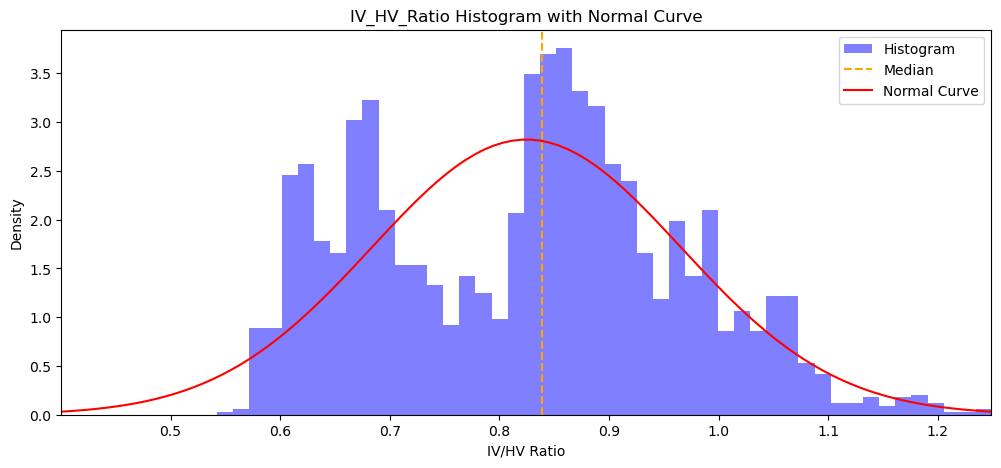

In [7]:
# Histograma de Voatilidad
plot_iv_hv_ratio_histogram(df_chart, column_name='IV_HV_Ratio')